# Code to Extract ESPN Game Win Probability

In [6]:
from lxml import html
from lxml.cssselect import CSSSelector

import json

css = CSSSelector

win_pct_marker = "espn.gamepackage.probability.data = "

def is_wins(x):
    return win_pct_marker in x

def extract_other_wins(doc):
    scripts = css("script")(doc)
    target_script = next(script for script in scripts if is_wins(script.text_content()))
    js = target_script.text_content()
    target_line = next(line for line in js.splitlines() if is_wins(line))
    start = target_line.find(win_pct_marker)
    data = target_line[start + len(win_pct_marker):-1]
    parsed = json.loads(data)
    return parsed

def extract(src):
    doc = html.fromstring(src)
    primary_win_pct = css(".header-win-percentage")(doc)[0].text_content()
    other_win_pcts = extract_other_wins(doc)
    return (primary_win_pct, other_win_pcts)

In [2]:
url = 'http://www.espn.com/nfl/game?gameId=400927752'

In [3]:
import requests
src = requests.get('http://www.espn.com/nfl/game?gameId=400927752')

In [10]:
score = extract(src.text)

In [11]:
import pandas as pd

In [45]:
pct = []
playid = []
for s in score[1]:
    print(s['homeWinPercentage'])
    print(s['playId'])
    pct.append(s['homeWinPercentage'])
    playid.append(s['playId'])

0.438
40092775239
0.569
40092775258
0.554
40092775280
0.498
400927752104
0.47
400927752125
0.524
400927752161
0.4
400927752182
0.403
400927752203
0.442
400927752227
0.461
400927752246
0.609
400927752271
0.577
400927752292
0.42
400927752316
0.444
400927752340
0.415
400927752361
0.39
400927752385
0.461
400927752409
0.476
400927752428
0.491
400927752457
0.483
400927752476
0.504
400927752495
0.373
400927752516
0.377
400927752540
0.5
400927752561
0.389
400927752582
0.458
400927752601
0.438
400927752631
0.431
400927752655
0.433
400927752676
0.433
400927752697
0.378
400927752713
0.518
400927752737
0.549
400927752769
0.59
400927752805
0.626
400927752829
0.65
400927752850
0.66
400927752871
0.686
400927752888
0.695
400927752921
0.724
400927752943
0.726
400927752965
0.751
400927752986
0.751
4009277521010
0.782
4009277521029
0.813
4009277521057
0.792
4009277521081
0.783
4009277521102
0.864
4009277521124
0.861
4009277521214
0.847
4009277521229
0.868
4009277521253
0.877
4009277521275
0.844
400927752

In [42]:
score[1][0]

{'homeWinPercentage': 0.438,
 'play': {'awayScore': 0,
  'clock': {'displayValue': '15:00'},
  'homeScore': 0,
  'period': {'number': 1},
  'start': {'distance': 0,
   'down': 0,
   'team': {'id': '1'},
   'yardLine': 35,
   'yardsToEndzone': 65},
  'text': 'M.Bosher kicks 65 yards from ATL 35 to end zone, Touchback.',
  'type': {'abbreviation': 'K', 'id': '53', 'text': 'Kickoff'}},
 'playId': '40092775239',
 'secondsLeft': 0,
 'tiePercentage': 0}

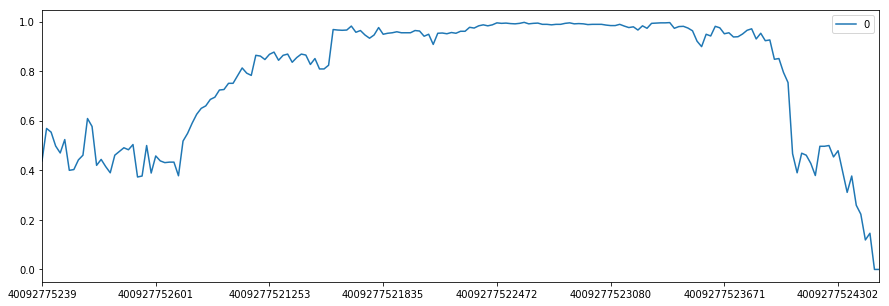

In [57]:
%matplotlib inline
pd.DataFrame(pct, playid).plot(figsize=(15,5))